# ETL

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [11]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_54e06cdc6cfc432899e9d4fa43bc02b9 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='DT_-edsxxOTfCqqZolN-TE1RmaU4n1mZrCUQC3LMcNlF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_54e06cdc6cfc432899e9d4fa43bc02b9.get_object(Bucket='ibmcapstoneproject-donotdelete-pr-zgrg2oycdglbye',Key='placement_data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)

df = df_data_1 
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
sl_no             215 non-null int64
gender            215 non-null object
ssc_p             215 non-null float64
ssc_b             215 non-null object
hsc_p             215 non-null float64
hsc_b             215 non-null object
hsc_s             215 non-null object
degree_p          215 non-null float64
degree_t          215 non-null object
workex            215 non-null object
etest_p           215 non-null float64
specialisation    215 non-null object
mba_p             215 non-null float64
status            215 non-null object
salary            148 non-null float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [13]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# Data Exploration

From info of the data, we can see the salary has only 148 entries and thus 67 entries are null value. This is due to the fact htat a guy is placed or not, thus for data cleansing ,we will remove the null values with some values helpful for us.(here zero)

In [14]:
#Replacing all the null values with zero
df['salary'].fillna(0, inplace = True)

In [15]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [16]:
data = df

status = {'Placed': 1,'Not Placed': 0} 
data['status'] = [status[item] for item in data['status']] 

In [17]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,status,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,0.688372,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,0.464240,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,1.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,1.000000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,1.000000,940000.000000


In [18]:
def plot(data,x,y):
    plt.Figure(figsize =(10,10))
    sns.boxplot(x = data[x],y= data[y])
    g = sns.FacetGrid(data, row = y)
    g = g.map(plt.hist,x)
    plt.show()

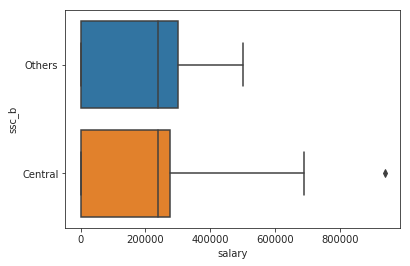

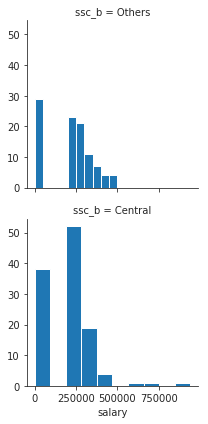

In [19]:
sns.set_style("ticks")
plot(data,"salary","ssc_b")